#### PGGM Bootcamp Text Analytics 2020
*Notebook by [Pedro V Hernandez Serrano](https://github.com/pedrohserrano)*

---
![](images/1_4.png)

# 1.4 Data Analysis
* [1.4.1. Most common words](#1.4.1)
* [1.4.2. Wordclouds](#1.4.2)
* [1.4.3. Relevant words analysis](#1.4.3)

---

## Exploratory data analysis of annual reports

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any algorithm, let's explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques.

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and total
3. **Trade-off Risk** - most common terms

---
### 1.4.1. Most Common Words
<a id="1.4.1">

We will read the document-term matrix and explore the words per document

In [1]:
import pandas as pd

In [2]:
data_matrix = pd.read_pickle('pickle/AnnualReports_matrix.pkl')
data_matrix.head()

,aa,aaa,aaaa,aaaaaa,aaanaaa,aaannf,aabouche,aabouchenchief,aac,aace,...,zwanzigste,zweite,zweiundzwanzigste,zwi,zwijndrecht,zygos,zylum,zyrus,zzzquil,zzzs
ABN_AMRO_Group_(2018).pdf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGNC_Investment_(2018).pdf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A_G_Barr_(2018).pdf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aboitiz_Power_(2018).pdf,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acer_(2018).pdf,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = data_matrix.transpose()

<br>
Find the top 30 words per report where each report is on every column

In [4]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

In [5]:
top_words = pd.DataFrame.from_dict(top_dict)
top_words

,ABN_AMRO_Group_(2018).pdf,AGNC_Investment_(2018).pdf,A_G_Barr_(2018).pdf,Aboitiz_Power_(2018).pdf,Acer_(2018).pdf,Acom_(2018).pdf,AerCap_Holdings_(2018).pdf,Ainsworth_Game_Technology_(2018).pdf,Austal_(2018).pdf,Autohome_(2018).pdf,...,Newfield_Exploration_(2018).pdf,News_Corp_(2018).pdf,Nippon_Shokubai_(2018).pdf,Pfizer_(2018).pdf,Ping_An_Insurance_(2018).pdf,Promotora_y_Operadora_de_Infraestructura_(2018).pdf,Provident_Financial_(2018).pdf,Prudential_(2018).pdf,Qube_Holdings_(2018).pdf,Reach_(2018).pdf
0,"(risk, 912)","(securities, 435)","(january, 340)","(power, 455)","(loss, 365)","(fiscal, 372)","(risk, 224)","(june, 156)","(nnthe, 201)","(prc, 415)",...,"(june, 74)","(fiscal, 638)","(march, 90)","(pfizer, 182)","(insurance, 909)","(toll, 949)","(loans, 948)","(liabilities, 388)","(audit, 56)","(revenue, 185)"
1,"(funding, 857)","(rate, 244)","(remuneration, 227)","(aboitiz, 275)","(recognized, 330)","(yen, 349)","(aed, 207)","(game, 110)","(limited, 178)","(services, 379)",...,"(nnthe, 72)","(june, 526)","(shokubai, 72)","(health, 145)","(risk, 616)","(road, 671)","(loan, 667)","(investment, 324)","(mining, 50)","(risk, 167)"
2,"(performancerisk, 426)","(investment, 211)","(barr, 216)","(energy, 216)","(related, 308)","(march, 291)","(investment, 190)","(date, 94)","(austal, 162)","(information, 369)",...,"(liabilities, 68)","(news, 334)","(sales, 66)","(patients, 114)","(ping, 485)","(concession, 661)","(june, 579)","(prudential, 316)","(lithium, 45)","(pension, 165)"
3,"(capital, 391)","(stock, 199)","(accounts, 195)","(information, 211)","(measured, 305)","(loans, 221)","(capital, 188)","(rights, 89)","(remuneration, 105)","(shall, 303)",...,"(exploration, 66)","(services, 273)","(based, 65)","(culture, 82)","(china, 456)","(concessions, 314)","(bank, 552)","(note, 274)","(altura, 44)","(audit, 161)"
4,"(credit, 379)","(common, 174)","(audit, 160)","(plant, 199)","(incorporated, 297)","(operating, 149)","(waha, 187)","(ainsworth, 88)","(recognised, 98)","(autohome, 297)",...,"(date, 64)","(operations, 204)","(loss, 63)","(global, 75)","(investment, 435)","(government, 267)","(fiscal, 450)","(insurance, 242)","(project, 34)","(plc, 158)"
5,"(bank, 318)","(mortgage, 148)","(scheme, 114)","(erc, 184)","(acer, 278)","(years, 149)","(loss, 132)","(thousand, 84)","(june, 91)","(ordinary, 264)",...,"(entity, 63)","(foxtel, 193)","(yen, 45)","(businessour, 72)","(profit, 333)","(nnthe, 248)","(corporation, 291)","(investments, 241)","(key, 31)","(acquisition, 150)"
6,"(amro, 317)","(market, 145)","(benefit, 112)","(bn, 180)","(profit, 244)","(credit, 148)","(equity, 120)","(gaming, 83)","(nnaustal, 90)","(advertising, 261)",...,"(loss, 61)","(including, 192)","(plant, 42)","(new, 68)","(rmb, 288)","(trust, 245)","(investment, 264)","(ifrs, 239)","(nin, 30)","(period, 147)"
7,"(loans, 311)","(risk, 140)","(risk, 104)","(aboitizpower, 179)","(comprehensive, 208)","(loan, 139)","(profit, 115)","(revenue, 81)","(information, 85)","(china, 217)",...,"(recognised, 61)","(related, 191)","(securities, 42)","(access, 64)","(asset, 278)","(state, 234)","(held, 263)","(uk, 218)","(information, 28)","(date, 132)"
8,"(capitalleadership, 292)","(rates, 139)","(pension, 103)","(distribution, 172)","(nnn, 192)","(nnmillions, 134)","(asset, 114)","(key, 79)","(profit, 76)","(agreement, 211)",...,"(project, 54)","(information, 188)","(responsible, 40)","(care, 63)","(capital, 231)","(roads, 223)","(losses, 216)","(cent, 215)","(ore, 26)","(publishing, 129)"
9,"(statementsotherintroductionstrategy, 251)","(agency, 127)","(executive, 100)","(statement, 171)","(new, 176)","(nnas, 129)","(recognised, 112)","(remuneration, 78)","(date, 74)","(internet, 207)",...,"(accounting, 50)","(primarily, 186)","(corporate, 37)","(leadershipour, 60)","(credit, 211)","(federal, 213)","(sale, 214)","(plc, 213)","(note, 25)","(digital, 127)"


<br>
We can try to find the number of unique words that each company uses

In [6]:
# list of companies we're working on
companies = list(data_matrix.index)

In [7]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for company in data.columns:
    uniques = data[company].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

In [8]:
# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(companies, unique_list)), columns=['company', 'unique_words'])

In [9]:
data_words.head()

,company,unique_words
0,ABN_AMRO_Group_(2018).pdf,10214
1,AGNC_Investment_(2018).pdf,5453
2,A_G_Barr_(2018).pdf,6070
3,Aboitiz_Power_(2018).pdf,6853
4,Acer_(2018).pdf,11160


In [10]:
# Find the total number of words per document
total_list = []
for company in data.columns:
    totals = sum(data[company])
    total_list.append(totals)
# Let's add some columns to our dataframe
data_words['total_words'] = total_list

Having the total words we can make the calculation on relative numbers, since is expected that the lenght of unique words will increase with the lenght of the document so we need to normalize it

In [11]:
# Calculate the ratio
data_words['unique_relative'] = data_words['unique_words']/data_words['total_words']

In [12]:
# Sort it out
data_sort = data_words.sort_values(by='unique_relative', ascending=False)
data_sort.head(10)

,company,unique_words,total_words,unique_relative
67,Kimberly-Clark_de_Mexico_(2018).pdf,1311,2028,0.646450
54,Helvetia_Holding_(2018).pdf,1642,3711,0.442468
90,Qube_Holdings_(2018).pdf,2301,5473,0.420428
78,Mitsubishi_Materials_Corporation_(2018).pdf,2530,6389,0.395993
69,Koito_Manufacturing_(2018).pdf,3040,8438,0.360275
85,Pfizer_(2018).pdf,4738,13377,0.354190
84,Nippon_Shokubai_(2018).pdf,2717,7988,0.340135
55,Hisamitsu_Pharmaceutical_(2018).pdf,2922,8592,0.340084
42,Freightways_(2018).pdf,4597,14357,0.320192
31,Costco_Wholesale_(2018).pdf,4684,15507,0.302057


In [13]:
import numpy as np
import matplotlib.pyplot as plt

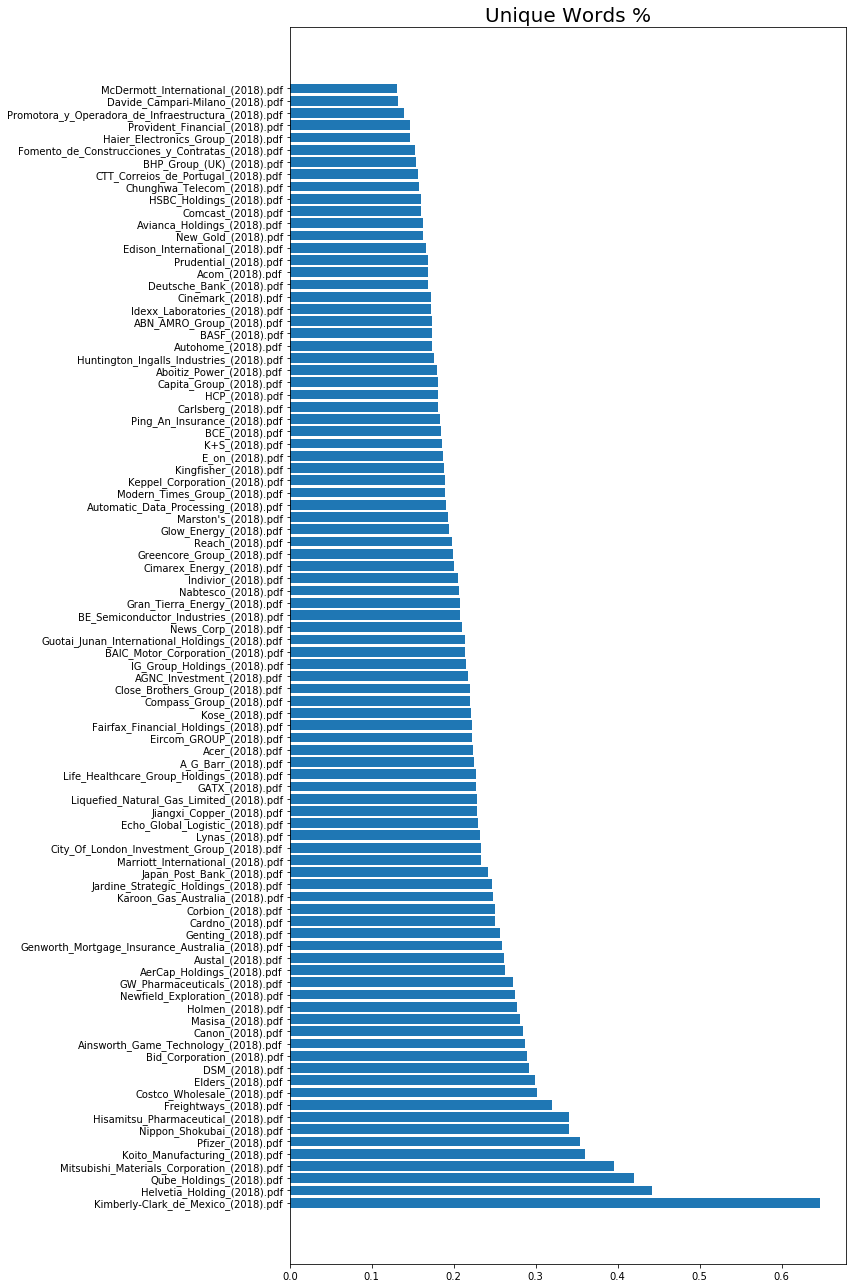

In [14]:
y_pos = np.arange(len(data_words))

plt.rcParams['figure.figsize'] = [12, 18]
plt.barh(y_pos, data_sort.unique_relative, align='center')
plt.yticks(y_pos, data_sort.company)
plt.title('Unique Words %', fontsize=20)

plt.tight_layout()
plt.show()

---
### 1.4.2. Wordclouds
<a id="1.4.2">

A Word Cloud is a good option to help visually interpret text at first gaze and gain insight into the most prominent items in a given text, by visualizing the word frequency in the text as a weighted list.

In [15]:
# Wordcloud python library
from wordcloud import WordCloud

In [16]:
# Dfining wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

To start to plot we would first need our corpus

In [17]:
# Read in the corpus in dataframe
data_clean = pd.read_pickle('pickle/AnnualReports_corpus.pkl')

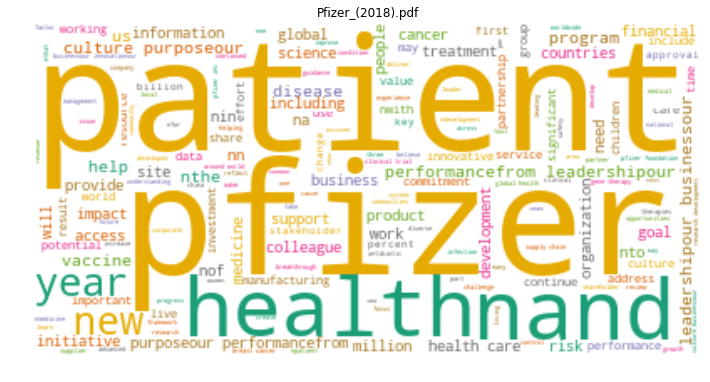

In [18]:
index = 'Pfizer_(2018).pdf' #'ABN_AMRO_Group_(2018).pdf' 
wc.generate(data_clean.report[index])
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(index)
plt.show()

---
#### *Learn more about Wordcloud library on its official documentation [amueller.github.io/word_cloud](https://amueller.github.io/word_cloud/index.html)*

---
### 1.4.3. Relevant words analysis (Risk-loss trade-off)
<a id="1.4.3">

Among our corpus we might find relevant certain terms related to something in particular, like negative or positive sentiment

In [19]:
top_words

,ABN_AMRO_Group_(2018).pdf,AGNC_Investment_(2018).pdf,A_G_Barr_(2018).pdf,Aboitiz_Power_(2018).pdf,Acer_(2018).pdf,Acom_(2018).pdf,AerCap_Holdings_(2018).pdf,Ainsworth_Game_Technology_(2018).pdf,Austal_(2018).pdf,Autohome_(2018).pdf,...,Newfield_Exploration_(2018).pdf,News_Corp_(2018).pdf,Nippon_Shokubai_(2018).pdf,Pfizer_(2018).pdf,Ping_An_Insurance_(2018).pdf,Promotora_y_Operadora_de_Infraestructura_(2018).pdf,Provident_Financial_(2018).pdf,Prudential_(2018).pdf,Qube_Holdings_(2018).pdf,Reach_(2018).pdf
0,"(risk, 912)","(securities, 435)","(january, 340)","(power, 455)","(loss, 365)","(fiscal, 372)","(risk, 224)","(june, 156)","(nnthe, 201)","(prc, 415)",...,"(june, 74)","(fiscal, 638)","(march, 90)","(pfizer, 182)","(insurance, 909)","(toll, 949)","(loans, 948)","(liabilities, 388)","(audit, 56)","(revenue, 185)"
1,"(funding, 857)","(rate, 244)","(remuneration, 227)","(aboitiz, 275)","(recognized, 330)","(yen, 349)","(aed, 207)","(game, 110)","(limited, 178)","(services, 379)",...,"(nnthe, 72)","(june, 526)","(shokubai, 72)","(health, 145)","(risk, 616)","(road, 671)","(loan, 667)","(investment, 324)","(mining, 50)","(risk, 167)"
2,"(performancerisk, 426)","(investment, 211)","(barr, 216)","(energy, 216)","(related, 308)","(march, 291)","(investment, 190)","(date, 94)","(austal, 162)","(information, 369)",...,"(liabilities, 68)","(news, 334)","(sales, 66)","(patients, 114)","(ping, 485)","(concession, 661)","(june, 579)","(prudential, 316)","(lithium, 45)","(pension, 165)"
3,"(capital, 391)","(stock, 199)","(accounts, 195)","(information, 211)","(measured, 305)","(loans, 221)","(capital, 188)","(rights, 89)","(remuneration, 105)","(shall, 303)",...,"(exploration, 66)","(services, 273)","(based, 65)","(culture, 82)","(china, 456)","(concessions, 314)","(bank, 552)","(note, 274)","(altura, 44)","(audit, 161)"
4,"(credit, 379)","(common, 174)","(audit, 160)","(plant, 199)","(incorporated, 297)","(operating, 149)","(waha, 187)","(ainsworth, 88)","(recognised, 98)","(autohome, 297)",...,"(date, 64)","(operations, 204)","(loss, 63)","(global, 75)","(investment, 435)","(government, 267)","(fiscal, 450)","(insurance, 242)","(project, 34)","(plc, 158)"
5,"(bank, 318)","(mortgage, 148)","(scheme, 114)","(erc, 184)","(acer, 278)","(years, 149)","(loss, 132)","(thousand, 84)","(june, 91)","(ordinary, 264)",...,"(entity, 63)","(foxtel, 193)","(yen, 45)","(businessour, 72)","(profit, 333)","(nnthe, 248)","(corporation, 291)","(investments, 241)","(key, 31)","(acquisition, 150)"
6,"(amro, 317)","(market, 145)","(benefit, 112)","(bn, 180)","(profit, 244)","(credit, 148)","(equity, 120)","(gaming, 83)","(nnaustal, 90)","(advertising, 261)",...,"(loss, 61)","(including, 192)","(plant, 42)","(new, 68)","(rmb, 288)","(trust, 245)","(investment, 264)","(ifrs, 239)","(nin, 30)","(period, 147)"
7,"(loans, 311)","(risk, 140)","(risk, 104)","(aboitizpower, 179)","(comprehensive, 208)","(loan, 139)","(profit, 115)","(revenue, 81)","(information, 85)","(china, 217)",...,"(recognised, 61)","(related, 191)","(securities, 42)","(access, 64)","(asset, 278)","(state, 234)","(held, 263)","(uk, 218)","(information, 28)","(date, 132)"
8,"(capitalleadership, 292)","(rates, 139)","(pension, 103)","(distribution, 172)","(nnn, 192)","(nnmillions, 134)","(asset, 114)","(key, 79)","(profit, 76)","(agreement, 211)",...,"(project, 54)","(information, 188)","(responsible, 40)","(care, 63)","(capital, 231)","(roads, 223)","(losses, 216)","(cent, 215)","(ore, 26)","(publishing, 129)"
9,"(statementsotherintroductionstrategy, 251)","(agency, 127)","(executive, 100)","(statement, 171)","(new, 176)","(nnas, 129)","(recognised, 112)","(remuneration, 78)","(date, 74)","(internet, 207)",...,"(accounting, 50)","(primarily, 186)","(corporate, 37)","(leadershipour, 60)","(credit, 211)","(federal, 213)","(sale, 214)","(plc, 213)","(note, 25)","(digital, 127)"


In [20]:
# Let's isolate just these risk words
data_risk_words = data_matrix[['risk', 'loss']]
data_risk_words

,risk,loss
ABN_AMRO_Group_(2018).pdf,912,103
AGNC_Investment_(2018).pdf,140,117
A_G_Barr_(2018).pdf,104,24
Aboitiz_Power_(2018).pdf,69,41
Acer_(2018).pdf,167,365
Acom_(2018).pdf,50,123
AerCap_Holdings_(2018).pdf,224,132
Ainsworth_Game_Technology_(2018).pdf,43,56
Austal_(2018).pdf,63,70
Autohome_(2018).pdf,43,38


In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
# We include the total count to this new dataframe
data_risk_words['total_words'] = list(data_sort.sort_values('company').total_words)

In [23]:
# We calculate the relatives
data_risk_words['relative_risk'] = data_risk_words['risk']/data_risk_words['total_words']*1000
data_risk_words['relative_loss'] = data_risk_words['loss']/data_risk_words['total_words']*1000

In [24]:
data_risk_words

,risk,loss,total_words,relative_risk,relative_loss
ABN_AMRO_Group_(2018).pdf,912,103,58954,15.469688,1.747125
AGNC_Investment_(2018).pdf,140,117,25041,5.590831,4.672337
A_G_Barr_(2018).pdf,104,24,27077,3.840898,0.886361
Aboitiz_Power_(2018).pdf,69,41,38141,1.809077,1.074959
Acer_(2018).pdf,167,365,49911,3.345956,7.313017
Acom_(2018).pdf,50,123,23052,2.169009,5.335763
AerCap_Holdings_(2018).pdf,224,132,20811,10.763539,6.342799
Ainsworth_Game_Technology_(2018).pdf,43,56,17815,2.413696,3.143418
Austal_(2018).pdf,63,70,17065,3.691767,4.101963
Autohome_(2018).pdf,43,38,57751,0.744576,0.657997


<br> 
We simply scatterplot the word counts

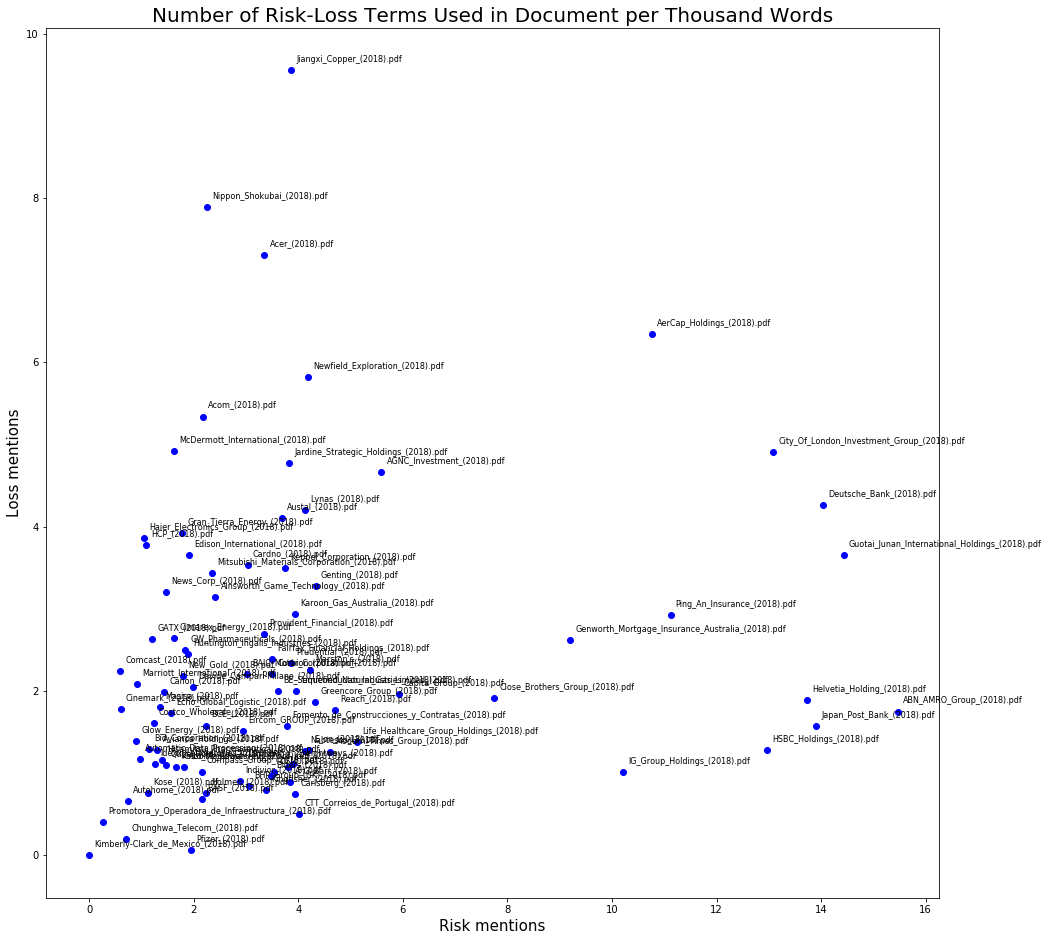

In [25]:
plt.rcParams['figure.figsize'] = [16, 16]

for i, company in enumerate(data_risk_words.index):
    x = round(data_risk_words.relative_risk.loc[company],2)
    y = round(data_risk_words.relative_loss.loc[company],2)
    plt.scatter(x, y, color='blue')
    plt.text(x+0.1, y+0.1, data_risk_words.index[i], fontsize=8)
    
plt.title('Number of Risk-Loss Terms Used in Document per Thousand Words', fontsize=20)
plt.xlabel('Risk mentions', fontsize=15)
plt.ylabel('Loss mentions', fontsize=15)

plt.show()

---
#### *More tips and tricks of Matplotlib python library at [realpython.com](https://realpython.com/python-matplotlib-guide/)*